In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import tensorflow as tf

The purpose of this Data analysis is to discover any interesting conclusions from a person's lifestyle. Whether exercise, sleeping, diet and other external factors affect a person's health score. The health score is a calculated score reflecting overall health status (continuous, 0-100).

In [21]:
df = pd.read_csv("synthetic_health_data.csv")

In [3]:
df

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894
...,...,...,...,...,...,...,...,...
995,36.626796,30.350751,1,60.674477,8.470913,0,3.823116,67.993747
996,61.572238,24.867394,3,66.527725,5.355398,1,5.597395,72.377621
997,47.690114,20.590627,4,69.819819,8.641864,0,8.195167,100.000000
998,33.145852,24.184665,6,70.724204,7.941557,0,3.676134,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


In [5]:
df.describe()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.231985,25.354181,2.888000,69.952977,6.973135,0.499000,3.079377,85.479947
std,11.750591,4.987272,1.995354,14.972061,1.517218,0.500249,2.084564,13.633845
min,1.104792,10.298057,0.000000,19.907497,2.431107,0.000000,-3.592506,29.106017
25%,32.228916,21.968792,1.000000,59.945481,5.903351,0.000000,1.644111,76.430819
50%,40.303607,25.315386,3.000000,69.975151,6.990847,0.000000,3.064261,87.498996
75%,47.775327,28.644411,5.000000,80.527839,8.054595,1.000000,4.489293,99.762644
max,86.232778,40.965538,6.000000,110.265186,11.638962,1.000000,11.105100,100.000000


In [6]:
print(df.isnull().sum())

Age                    0
BMI                    0
Exercise_Frequency     0
Diet_Quality           0
Sleep_Hours            0
Smoking_Status         0
Alcohol_Consumption    0
Health_Score           0
dtype: int64


Text(0, 0.5, 'Health Score')

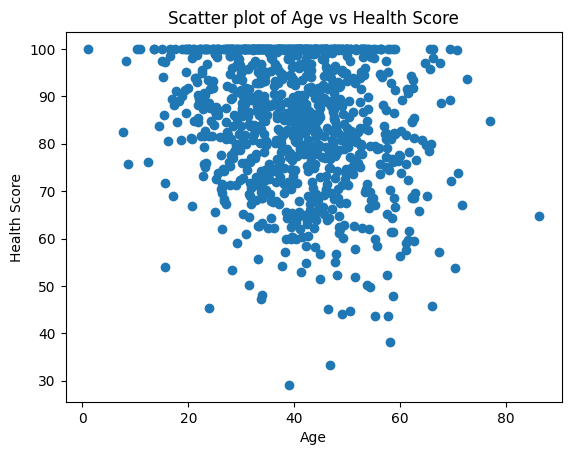

In [7]:
#Scatter plot of age vs health score

plt.scatter(y=df['Health_Score'], x=df['Age'])
plt.title("Scatter plot of Age vs Health Score")
plt.xlabel('Age')
plt.ylabel('Health Score')

In [8]:
#Creating bins and labels to categorise every person by age groups

bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

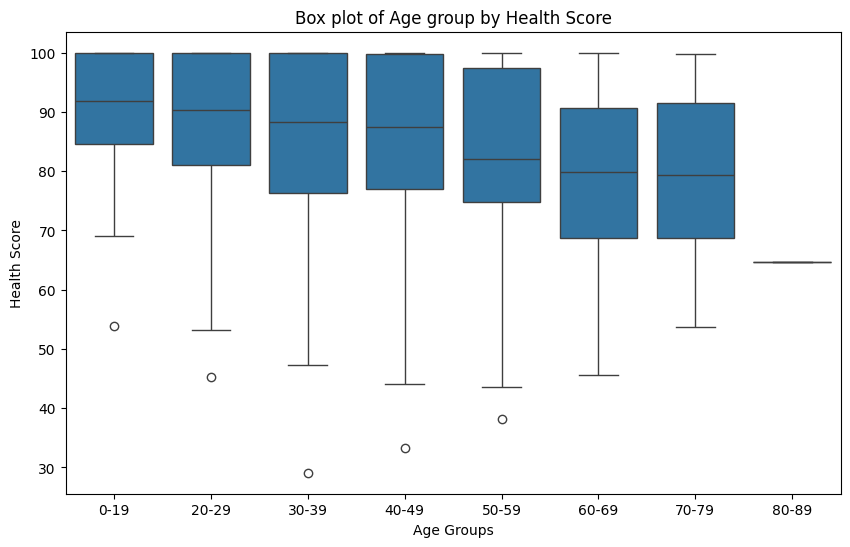

In [9]:
#Creating the box plot of all the age groups
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age_Group'], y=df['Health_Score'])
plt.title("Box plot of Age group by Health Score")
plt.xlabel("Age Groups")
plt.ylabel("Health Score")
plt.show()

Text(0.5, 0, 'Health Score')

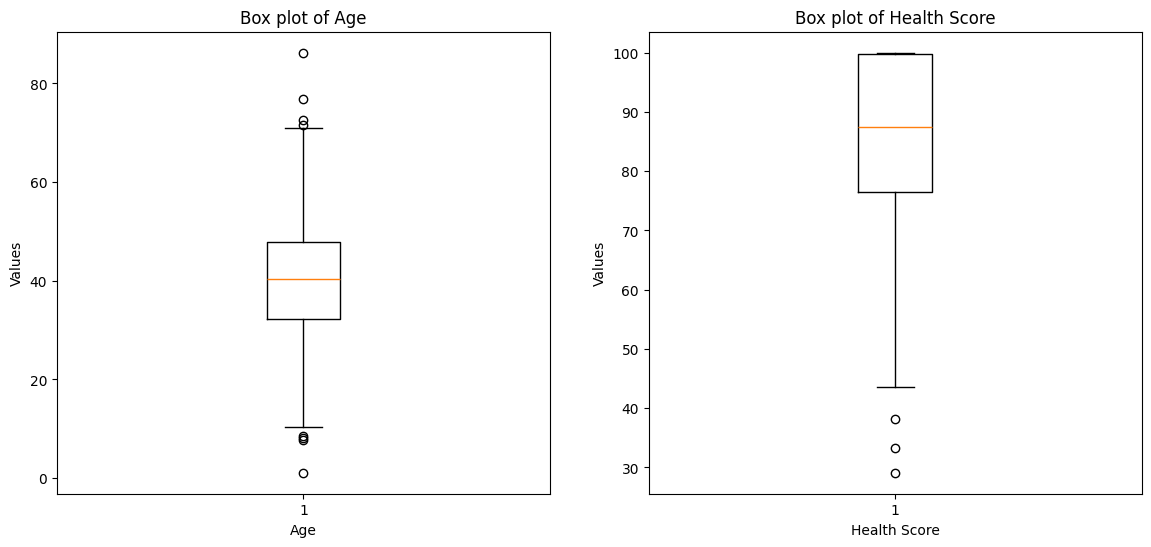

In [10]:
#Creating a boxplot figure with a set of subplots

fig, ax= plt.subplots(1, 2, figsize=(14, 6))

#Figure 0 is for age
ax[0].boxplot(df['Age'])
ax[0].set_title("Box plot of Age")
ax[0].set_ylabel("Values")
ax[0].set_xlabel("Age")

#Figure 1 is for Health Score
ax[1].boxplot(df['Health_Score'])
ax[1].set_title("Box plot of Health Score")
ax[1].set_ylabel("Values")
ax[1].set_xlabel("Health Score")

In [24]:
# Identify outliers using Z-score
from scipy.stats import zscore

df['BMI_Z'] = zscore(df['BMI'])
outliers = df[(df['BMI'] > 3) & (df['BMI_Z'] < -3)]

df

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Alcohol_Consumption,Health_Score,Smoking_Status_1,Alchohol_Consumption,BMI_Z
0,45.960570,31.996777,5,55.403270,7.300359,2.834707,70.542122,False,457,1.332576
1,38.340828,29.623168,6,41.838357,7.012419,7.199517,57.244637,True,972,0.856405
2,47.772262,25.298152,5,76.904948,6.028641,4.097944,96.333722,True,679,-0.011240
3,58.276358,21.765316,2,49.756767,5.802714,3.649377,61.321783,True,604,-0.719965
4,37.190160,28.491117,2,44.218737,7.912548,2.839795,67.175894,False,458,0.629303
...,...,...,...,...,...,...,...,...,...,...
995,36.626796,30.350751,1,60.674477,8.470913,3.823116,67.993747,False,638,1.002366
996,61.572238,24.867394,3,66.527725,5.355398,5.597395,72.377621,True,883,-0.097655
997,47.690114,20.590627,4,69.819819,8.641864,8.195167,100.000000,False,991,-0.955620
998,33.145852,24.184665,6,70.724204,7.941557,3.676134,100.000000,False,609,-0.234617


In [25]:
#Removing the outliers that have high body mass index
data = df[(df['BMI_Z'] <=3) & (df['BMI_Z'] >= -3)]

data

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Alcohol_Consumption,Health_Score,Smoking_Status_1,Alchohol_Consumption,BMI_Z
0,45.960570,31.996777,5,55.403270,7.300359,2.834707,70.542122,False,457,1.332576
1,38.340828,29.623168,6,41.838357,7.012419,7.199517,57.244637,True,972,0.856405
2,47.772262,25.298152,5,76.904948,6.028641,4.097944,96.333722,True,679,-0.011240
3,58.276358,21.765316,2,49.756767,5.802714,3.649377,61.321783,True,604,-0.719965
4,37.190160,28.491117,2,44.218737,7.912548,2.839795,67.175894,False,458,0.629303
...,...,...,...,...,...,...,...,...,...,...
995,36.626796,30.350751,1,60.674477,8.470913,3.823116,67.993747,False,638,1.002366
996,61.572238,24.867394,3,66.527725,5.355398,5.597395,72.377621,True,883,-0.097655
997,47.690114,20.590627,4,69.819819,8.641864,8.195167,100.000000,False,991,-0.955620
998,33.145852,24.184665,6,70.724204,7.941557,3.676134,100.000000,False,609,-0.234617


In [29]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   996 non-null    float64
 1   BMI                   996 non-null    float64
 2   Exercise_Frequency    996 non-null    int64  
 3   Diet_Quality          996 non-null    float64
 4   Sleep_Hours           996 non-null    float64
 5   Alcohol_Consumption   996 non-null    float64
 6   Health_Score          996 non-null    float64
 7   Smoking_Status_1      996 non-null    bool   
 8   Alchohol_Consumption  996 non-null    int64  
 9   BMI_Z                 996 non-null    float64
dtypes: bool(1), float64(7), int64(2)
memory usage: 78.8 KB
None


In [ ]:
# #Categorical Encoding
# data = pd.get_dummies(data, columns=['Smoking_Status'], drop_first=True)


# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# data['Alchohol_Consumption'] = encoder.fit_transform(data['Alcohol_Consumption'])

# data

KeyError: "None of [Index(['Smoking_Status'], dtype='object')] are in the [columns]"